# SPH Method

In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# load dataset
data = pd.read_csv('sph_dataset.csv')

In [3]:
data.describe()

,Name,Angular_Velocity_Z_Component,Velocity_2_Z_Component,Total_Deformation_Maximum,Equivalent_Stress_Maximum,Energy_Probe_Maximum_Total
count,51.000000,51.000000,51.000000,51.000000,5.100000e+01,5.100000e+01
mean,25.000000,520.000000,-185.000000,0.418431,1.156907e+09,1.863810e+06
std,14.866069,74.330344,37.165172,0.059342,7.690064e+07,5.306435e+05
min,0.000000,395.000000,-247.500000,0.320000,9.654931e+08,1.044617e+06
25%,12.500000,457.500000,-216.250000,0.370000,1.133473e+09,1.408042e+06
50%,25.000000,520.000000,-185.000000,0.420000,1.165263e+09,1.825960e+06
75%,37.500000,582.500000,-153.750000,0.470000,1.206951e+09,2.298561e+06
max,50.000000,645.000000,-122.500000,0.520000,1.263824e+09,2.825661e+06


# Colinearity test

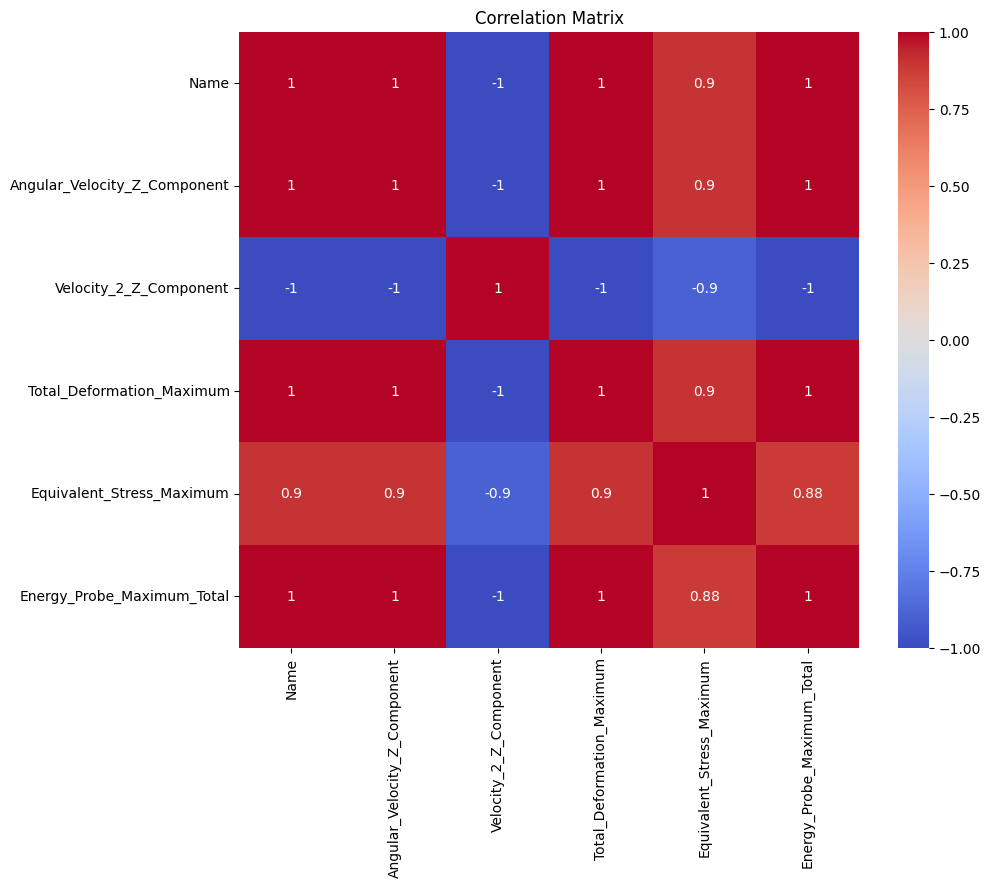

In [4]:
# plot to check colinearity matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create a correlation matrix
corr_matrix = data.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [5]:
# create a new data frame excluding the name column
df_new = data.drop('Name', axis=1)


In [6]:
df_new.head()

,Angular_Velocity_Z_Component,Velocity_2_Z_Component,Total_Deformation_Maximum,Equivalent_Stress_Maximum,Energy_Probe_Maximum_Total
0,395,-122.5,0.32,9.654931e+08,1044616.68
1,400,-125.0,0.32,9.882366e+08,1071678.09
2,405,-127.5,0.33,9.851702e+08,1099089.05
3,410,-130.0,0.33,9.985108e+08,1126849.09
4,415,-132.5,0.33,1.025123e+09,1154959.66


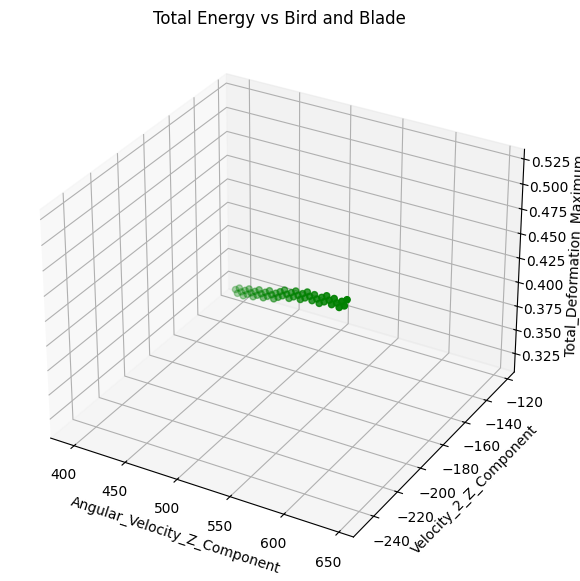

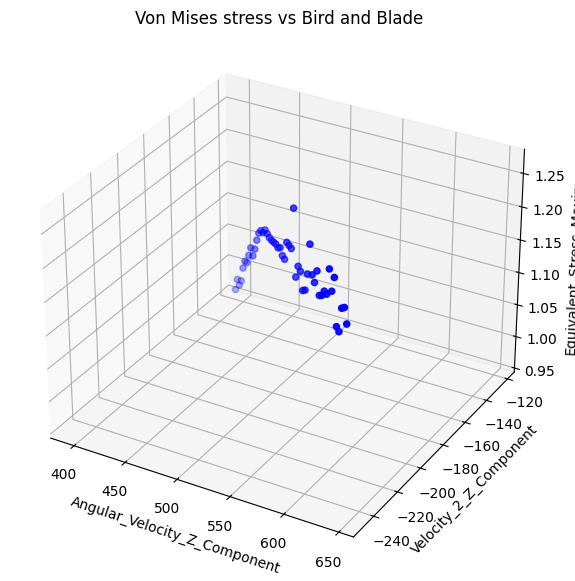

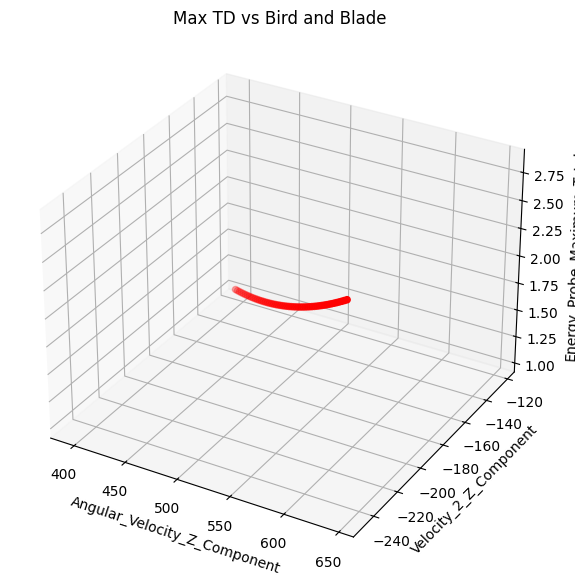

In [7]:
# plots to see the distributions
# plot Total Energy vs Bird and Blade
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_new['Angular_Velocity_Z_Component'], df_new['Velocity_2_Z_Component'], df_new['Total_Deformation_Maximum'], c='g', marker='o')
ax.set_title('Total Energy vs Bird and Blade')
ax.set_xlabel('Angular_Velocity_Z_Component')
ax.set_ylabel('Velocity_2_Z_Component')
ax.set_zlabel('Total_Deformation_Maximum')
plt.show()

# plot Von Mises Stress vs Bird and Blade
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_new['Angular_Velocity_Z_Component'], df_new['Velocity_2_Z_Component'], df_new['Equivalent_Stress_Maximum'], c='b', marker='o')
ax.set_title('Von Mises stress vs Bird and Blade')
ax.set_xlabel('Angular_Velocity_Z_Component')
ax.set_ylabel('Velocity_2_Z_Component')
ax.set_zlabel('Equivalent_Stress_Maximum')
plt.show()

# plot Max TD vs Bird and Blade
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_new['Angular_Velocity_Z_Component'], df_new['Velocity_2_Z_Component'], df_new['Energy_Probe_Maximum_Total'], c='r', marker='o')
ax.set_title('Max TD vs Bird and Blade')
ax.set_xlabel('Angular_Velocity_Z_Component')
ax.set_ylabel('Velocity_2_Z_Component')
ax.set_zlabel('Energy_Probe_Maximum_Total')
plt.show()

In [8]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 1. Total Deformation Plot
fig1 = go.Figure(data=[go.Scatter3d(
    x=df_new['Angular_Velocity_Z_Component'],
    y=df_new['Velocity_2_Z_Component'],
    z=df_new['Total_Deformation_Maximum'],
    mode='markers',
    marker=dict(size=5, color='green', opacity=0.8)
)])
fig1.update_layout(title='3D: Total Deformation vs Velocity Components',
                  scene=dict(xaxis_title='Angular Velocity',
                             yaxis_title='Velocity Z component',
                             zaxis_title='Total Deformation'))
fig1.show()

# 2. Equivalent Stress Plot
fig2 = go.Figure(data=[go.Scatter3d(
    x=df_new['Angular_Velocity_Z_Component'],
    y=df_new['Velocity_2_Z_Component'],
    z=df_new['Equivalent_Stress_Maximum'],
    mode='markers',
    marker=dict(size=5, color='blue', opacity=0.8)
)])
fig2.update_layout(title='3D: Equivalent Stress vs Velocity Components',
                  scene=dict(xaxis_title='Angular Velocity',
                             yaxis_title='Velocity Z component',
                             zaxis_title='Equivalent Stress'))
fig2.show()

# 3. Energy Probe Plot
fig3 = go.Figure(data=[go.Scatter3d(
    x=df_new['Angular_Velocity_Z_Component'],
    y=df_new['Velocity_2_Z_Component'],
    z=df_new['Energy_Probe_Maximum_Total'],
    mode='markers',
    marker=dict(size=5, color='red', opacity=0.8)
)])
fig3.update_layout(title='3D: Energy Probe vs Velocity Components',
                  scene=dict(xaxis_title='Angular Velocity',
                             yaxis_title='Velocity Z component',
                             zaxis_title='Energy Probe'))
fig3.show()

# Random Forest

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np



X = df_new[['Angular_Velocity_Z_Component','Equivalent_Stress_Maximum']]
y = pd.DataFrame({
    'Max_TD_mm': df_new['Total_Deformation_Maximum'],
    'Von_Mises_Stress_MPa': df_new['Equivalent_Stress_Maximum'] / 1e6,
    'Total_Energy_kJ': df_new['Energy_Probe_Maximum_Total'] / 1000
}) # Convert to kJ

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

rf_model = RandomForestRegressor(
    n_estimators=25,
    random_state=42,
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=2,
    n_jobs=-1,
    max_features='sqrt'
)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Random Forest Regression Results:")
print(f"RMSE : {rmse:.4f}")
print(f"R²   : {r2:.4f}")
print(f"MSE  : {mse:.4f}")

print ("\n k mean cross validation \n")

# Do K mean cross validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rmse_list = []
for train_index, test_index in kf.split(X):
    X_train_kf, X_test_kf = X.iloc[train_index], X.iloc[test_index]
    y_train_kf, y_test_kf = y.iloc[train_index], y.iloc[test_index]
    
    rf_model_kf = RandomForestRegressor(
    n_estimators=25,
    random_state=42,
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=2,
    n_jobs=-1,
    max_features='sqrt'
    )
    
    rf_model_kf.fit(X_train_kf, y_train_kf)
    y_pred_kf = rf_model_kf.predict(X_test_kf)
    
    mse_kf = mean_squared_error(y_test_kf, y_pred_kf)
    r2_kf = r2_score(y_test_kf, y_pred_kf)
    rmse_kf = np.sqrt(mse_kf)
    rmse_list.append(rmse_kf)
average_rmse = np.mean(rmse_list)
print(f"Average RMSE from K-Fold CV: {average_rmse:.4f}")
print(f"RMSEs from each fold: {rmse_list}")
print(f"R²   : {r2_kf:.4f}")
print(f"MSE  : {mse_kf:.4f}")

# At fold 4 :
# likely at very high or very low speeds the model finds harder to predict.

# Feature imporatnace in number format
importances = rf_model_kf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importances:")
print(feature_importance_df)



Random Forest Regression Results:
RMSE : 35.1483
R²   : 0.9789
MSE  : 1235.4003

 k mean cross validation 

Average RMSE from K-Fold CV: 52.1306
RMSEs from each fold: [np.float64(34.25118794188922), np.float64(61.964693912530905), np.float64(68.50454879152167), np.float64(34.43591780529251), np.float64(61.49667621886231)]
R²   : 0.9505
MSE  : 3781.8412

Feature Importances:
                        Feature  Importance
0  Angular_Velocity_Z_Component    0.560922
1     Equivalent_Stress_Maximum    0.439078


In [10]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, r2_score
# import numpy as np



# X = df_new[['Angular_Velocity_Z_Component','Equivalent_Stress_Maximum']]
# y = df_new['Total_Deformation_Maximum']

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42
# )

# rf_model = RandomForestRegressor(
#     n_estimators=25,
#     random_state=42,
#     max_depth=5,
#     min_samples_split=2,
#     min_samples_leaf=2,
#     n_jobs=-1,
#     max_features='sqrt'
# )

# rf_model.fit(X_train, y_train)

# y_pred = rf_model.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# r2 = r2_score(y_test, y_pred)

# print("Random Forest Regression Results:")
# print(f"RMSE : {rmse:.4f}")
# print(f"R²   : {r2:.4f}")
# print(f"MSE  : {mse:.4f}")

# print ("\n k mean cross validation \n")

# # Do K mean cross validation
# from sklearn.model_selection import KFold
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
# rmse_list = []
# for train_index, test_index in kf.split(X):
#     X_train_kf, X_test_kf = X.iloc[train_index], X.iloc[test_index]
#     y_train_kf, y_test_kf = y.iloc[train_index], y.iloc[test_index]
    
#     rf_model_kf = RandomForestRegressor(
#     n_estimators=25,
#     random_state=42,
#     max_depth=5,
#     min_samples_split=2,
#     min_samples_leaf=2,
#     n_jobs=-1,
#     max_features='sqrt'
#     )
    
#     rf_model_kf.fit(X_train_kf, y_train_kf)
#     y_pred_kf = rf_model_kf.predict(X_test_kf)
    
#     mse_kf = mean_squared_error(y_test_kf, y_pred_kf)
#     r2_kf = r2_score(y_test_kf, y_pred_kf)
#     rmse_kf = np.sqrt(mse_kf)
#     rmse_list.append(rmse_kf)
# average_rmse = np.mean(rmse_list)
# print(f"Average RMSE from K-Fold CV: {average_rmse:.4f}")
# print(f"RMSEs from each fold: {rmse_list}")
# print(f"R²   : {r2_kf:.4f}")
# print(f"MSE  : {mse_kf:.4f}")

# # At fold 4 :
# # likely at very high or very low speeds the model finds harder to predict.

# # Feature imporatnace in number format
# importances = rf_model_kf.feature_importances_
# feature_names = X.columns
# feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
# feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# print("\nFeature Importances:")
# print(feature_importance_df)



# SVR with RBF

In [11]:

# SVR only supports single-output regression, so we fit one model per target

X = df_new[['Angular_Velocity_Z_Component','Equivalent_Stress_Maximum']]
y = pd.DataFrame({
    'Total_Deformation_Maximum': df_new['Total_Deformation_Maximum'],
    'Equivalent_Stress_Maximum': df_new['Equivalent_Stress_Maximum'] / 1e6,
    'Energy_Probe_Maximum_Total': df_new['Energy_Probe_Maximum_Total'] / 1000
}) # Convert to kJ

targets = y.columns
results = {}

for target in targets:
    # Split data into training and testing sets for this target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    X_train_scaled = StandardScaler().fit_transform(X_train)
    X_test_scaled = StandardScaler().fit_transform(X_test)

    y_train_target = y_train[target]
    y_test_target = y_test[target]

    # Train SVR model
    model = SVR(kernel='rbf', C=160, gamma= 0.1, epsilon=0.1)
    model.fit(X_train_scaled, y_train_target)

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Evaluate model
    mse_svr = mean_squared_error(y_test_target, y_pred)
    rmse_svr = np.sqrt(mse_svr)
    r2_svr = r2_score(y_test_target, y_pred)

    print(f"\nResults for {target}:")
    print(f'Mean Squared Error: {mse_svr:.4f}')
    print(f'RMSE: {rmse_svr:.4f}')
    print(f'R² Score: {r2_svr:.4f}')

    # K-Fold cross-validation for SVR
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    rmse_list_svr = []
    for train_index, test_index in kf.split(X):
        X_train_kf, X_test_kf = X.iloc[train_index], X.iloc[test_index]
        y_train_kf = y.iloc[train_index][target]
        y_test_kf = y.iloc[test_index][target]

        # Standardize features for each fold
        scaler_kf = StandardScaler()
        X_train_kf_scaled = scaler_kf.fit_transform(X_train_kf)
        X_test_kf_scaled = scaler_kf.transform(X_test_kf)

        svr_model_kf = SVR(kernel='rbf', C=160, gamma=1, epsilon=0.1)
        svr_model_kf.fit(X_train_kf_scaled, y_train_kf)
        y_pred_kf_svr = svr_model_kf.predict(X_test_kf_scaled)

        mse_kf_svr = mean_squared_error(y_test_kf, y_pred_kf_svr)
        rmse_kf_svr = np.sqrt(mse_kf_svr)
        rmse_list_svr.append(rmse_kf_svr)
    average_rmse_svr = np.mean(rmse_list_svr)
    print(f"Average MSE from K-Fold CV (SVR): {average_rmse_svr:.4f}")
    print(f"MSEs from each fold (SVR): {rmse_list_svr}")
    print(f"K fold R²   : {r2_svr:.4f}")

# Feature importance is not directly available for SVR models


Results for Total_Deformation_Maximum:
Mean Squared Error: 0.0028
RMSE: 0.0527
R² Score: -0.0108
Average MSE from K-Fold CV (SVR): 0.0587
MSEs from each fold (SVR): [np.float64(0.05274294437949194), np.float64(0.06855654600401044), np.float64(0.057532599454570114), np.float64(0.05966573556070519), np.float64(0.05481788029466298)]
K fold R²   : -0.0108

Results for Equivalent_Stress_Maximum:
Mean Squared Error: 141.2992
RMSE: 11.8869
R² Score: 0.9643
Average MSE from K-Fold CV (SVR): 4.7151
MSEs from each fold (SVR): [np.float64(2.4239846515364567), np.float64(1.0734218969099822), np.float64(9.516433931442352), np.float64(1.6056630255919944), np.float64(8.955869286146346)]
K fold R²   : 0.9643

Results for Energy_Probe_Maximum_Total:
Mean Squared Error: 7763.5226
RMSE: 88.1109
R² Score: 0.9656
Average MSE from K-Fold CV (SVR): 99.7348
MSEs from each fold (SVR): [np.float64(59.56631999526578), np.float64(156.90981443357433), np.float64(98.64424883352392), np.float64(96.98015220661811), 

# Poly Regression

In [12]:
# polynomial regression only supports single-output regression, so we fit one model per target
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
targets = y.columns
for target in targets:
    # Split data into training and testing sets for this target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

    X_train_scaled = StandardScaler().fit_transform(X_train)
    X_test_scaled = StandardScaler().fit_transform(X_test)

    y_train_target = y_train[target]
    y_test_target = y_test[target]

    # Create polynomial features
    poly = PolynomialFeatures(degree=2)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)

    # Train polynomial regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train_target)

    # Make predictions
    y_pred = model.predict(X_test_poly)

    # Evaluate model
    mse_poly = mean_squared_error(y_test_target, y_pred)
    rmse_poly = np.sqrt(mse_poly)
    r2_poly = r2_score(y_test_target, y_pred)

    print(f"\nPolynomial Regression Results for {target}:")
    print(f'Mean Squared Error: {mse_poly:.4f}')
    print(f'RMSE: {rmse_poly:.4f}')
    print(f'R² Score: {r2_poly:.4f}')
    # K-Fold cross-validation for Polynomial Regression
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    rmse_list_poly = []
    for train_index, test_index in kf.split(X):
        X_train_kf, X_test_kf = X.iloc[train_index], X.iloc[test_index]
        y_train_kf = y.iloc[train_index][target]
        y_test_kf = y.iloc[test_index][target]

        # Standardize features for each fold
        scaler_kf = StandardScaler()
        X_train_kf_scaled = scaler_kf.fit_transform(X_train_kf)
        X_test_kf_scaled = scaler_kf.transform(X_test_kf)

        # Create polynomial features
        poly_kf = PolynomialFeatures(degree=2)
        X_train_kf_poly = poly_kf.fit_transform(X_train_kf_scaled)
        X_test_kf_poly = poly_kf.transform(X_test_kf_scaled)

        poly_model_kf = LinearRegression()
        poly_model_kf.fit(X_train_kf_poly, y_train_kf)
        y_pred_kf_poly = poly_model_kf.predict(X_test_kf_poly)

        mse_kf_poly = mean_squared_error(y_test_kf, y_pred_kf_poly)
        rmse_kf_poly = np.sqrt(mse_kf_poly)
        rmse_list_poly.append(rmse_kf_poly)
    average_rmse_poly = np.mean(rmse_list_poly)
    print(f"Average MSE from K-Fold CV (Polynomial Regression): {average_rmse_poly:.4f}")
    print(f"MSEs from each fold (Polynomial Regression): {rmse_list_poly}")
    print(f"K fold R²   : {r2_poly:.4f}")

    


Polynomial Regression Results for Total_Deformation_Maximum:
Mean Squared Error: 0.0015
RMSE: 0.0390
R² Score: 0.2648
Average MSE from K-Fold CV (Polynomial Regression): 0.0033
MSEs from each fold (Polynomial Regression): [np.float64(0.003029562380848872), np.float64(0.0034545280748101816), np.float64(0.0031735235362113138), np.float64(0.003026708306096716), np.float64(0.0037312340616279106)]
K fold R²   : 0.2648

Polynomial Regression Results for Equivalent_Stress_Maximum:
Mean Squared Error: 2857.2295
RMSE: 53.4531
R² Score: -0.6448
Average MSE from K-Fold CV (Polynomial Regression): 0.0000
MSEs from each fold (Polynomial Regression): [np.float64(1.1874202934156835e-13), np.float64(2.5924587705484056e-13), np.float64(1.9360170842817752e-13), np.float64(1.3451608044987588e-13), np.float64(1.016845989170083e-13)]
K fold R²   : -0.6448

Polynomial Regression Results for Energy_Probe_Maximum_Total:
Mean Squared Error: 97274.8094
RMSE: 311.8891
R² Score: 0.4992
Average MSE from K-Fold CV

In [13]:
# XGBoost only supports single-output regression, so we fit one model per target
import xgboost as xgb
targets = y.columns
for target in targets:
    # Split data into training and testing sets for this target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

    X_train_scaled = StandardScaler().fit_transform(X_train)
    X_test_scaled = StandardScaler().fit_transform(X_test)

    y_train_target = y_train[target]
    y_test_target = y_test[target]

    # Train XGBoost model
    model = xgb.XGBRegressor(
        objective='reg:squarederror',
        n_estimators=100,
        learning_rate=0.1,
        max_depth=5,
        random_state=42
    )
    model.fit(X_train_scaled, y_train_target)

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Evaluate model
    mse_xgb = mean_squared_error(y_test_target, y_pred)
    rmse_xgb = np.sqrt(mse_xgb)
    r2_xgb = r2_score(y_test_target, y_pred)

    print(f"\nXGBoost Results for {target}:")
    print(f'Mean Squared Error: {mse_xgb:.4f}')
    print(f'RMSE: {rmse_xgb:.4f}')
    print(f'R² Score: {r2_xgb:.4f}')
    # K-Fold cross-validation for XGBoost
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    rmse_list_xgb = []
    for train_index, test_index in kf.split(X):
        X_train_kf, X_test_kf = X.iloc[train_index], X.iloc[test_index]
        y_train_kf = y.iloc[train_index][target]
        y_test_kf = y.iloc[test_index][target]

        # Standardize features for each fold
        scaler_kf = StandardScaler()
        X_train_kf_scaled = scaler_kf.fit_transform(X_train_kf)
        X_test_kf_scaled = scaler_kf.transform(X_test_kf)

        xgb_model_kf = xgb.XGBRegressor(
            objective='reg:squarederror',
            n_estimators=100,
            learning_rate=0.1,
            max_depth=5,
            random_state=42
        )
        xgb_model_kf.fit(X_train_kf_scaled, y_train_kf)
        y_pred_kf_xgb = xgb_model_kf.predict(X_test_kf_scaled)

        mse_kf_xgb = mean_squared_error(y_test_kf, y_pred_kf_xgb)
        rmse_kf_xgb = np.sqrt(mse_kf_xgb)
        rmse_list_xgb.append(rmse_kf_xgb)
    average_rmse_xgb = np.mean(rmse_list_xgb)
    print(f"Average MSE from K-Fold CV (XGBoost): {average_rmse_xgb:.4f}")
    print(f"MSEs from each fold (XGBoost): {rmse_list_xgb}")
    print(f"K fold R²   : {r2_xgb:.4f}")

# Feature importance for XGBoost
    importance = model.feature_importances_
    feature_names = X.columns
    feature_importance_df_xgb = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
    feature_importance_df_xgb = feature_importance_df_xgb.sort_values(by='Importance', ascending=False)
    print("\nXGBoost Feature Importances:")
    print(feature_importance_df_xgb)

    


XGBoost Results for Total_Deformation_Maximum:
Mean Squared Error: 0.0015
RMSE: 0.0392
R² Score: 0.2562
Average MSE from K-Fold CV (XGBoost): 0.0065
MSEs from each fold (XGBoost): [np.float64(0.007372333886424675), np.float64(0.0055484183095339265), np.float64(0.005526323135805141), np.float64(0.006108792950782582), np.float64(0.007831341816623828)]
K fold R²   : 0.2562

XGBoost Feature Importances:
                        Feature  Importance
0  Angular_Velocity_Z_Component         1.0
1     Equivalent_Stress_Maximum         0.0

XGBoost Results for Equivalent_Stress_Maximum:
Mean Squared Error: 4328.5288
RMSE: 65.7916
R² Score: -1.4918
Average MSE from K-Fold CV (XGBoost): 11.2114
MSEs from each fold (XGBoost): [np.float64(12.12488054114698), np.float64(11.298299506953198), np.float64(10.54855478130155), np.float64(10.971367444174042), np.float64(11.113958526994281)]
K fold R²   : -1.4918

XGBoost Feature Importances:
                        Feature  Importance
0  Angular_Velocity_Z_

In [14]:
# Neural Network only supports single-output regression, so we fit one model per target
import tensorflow as tf
targets = y.columns
for target in targets:
    # Split data into training and testing sets for this target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

    X_train_scaled = StandardScaler().fit_transform(X_train)
    X_test_scaled = StandardScaler().fit_transform(X_test)

    y_train_target = y_train[target]
    y_test_target = y_test[target]

    # Build neural network model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1)
    ])

    model.compile(optimizer='adam', loss='mse')

    # Train model
    model.fit(X_train_scaled, y_train_target, epochs=100, batch_size=8, verbose=0)

    # Make predictions
    y_pred = model.predict(X_test_scaled).flatten()

    # Evaluate model
    mse_nn = mean_squared_error(y_test_target, y_pred)
    rmse_nn = np.sqrt(mse_nn)
    r2_nn = r2_score(y_test_target, y_pred)

    print(f"\nNeural Network Results for {target}:")
    print(f'Mean Squared Error: {mse_nn:.4f}')
    print(f'RMSE: {rmse_nn:.4f}')
    print(f'R² Score: {r2_nn:.4f}')
    # K-Fold cross-validation for Neural Network
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    rmse_list_nn = []
    for train_index, test_index in kf.split(X):
        X_train_kf, X_test_kf = X.iloc[train_index], X.iloc[test_index]
        y_train_kf = y.iloc[train_index][target]
        y_test_kf = y.iloc[test_index][target]

        # Standardize features for each fold
        scaler_kf = StandardScaler()
        X_train_kf_scaled = scaler_kf.fit_transform(X_train_kf)
        X_test_kf_scaled = scaler_kf.transform(X_test_kf)

        nn_model_kf = tf.keras.Sequential([
            tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_kf_scaled.shape[1],)),
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dense(1)
        ])

        nn_model_kf.compile(optimizer='adam', loss='mse')

        nn_model_kf.fit(X_train_kf_scaled, y_train_kf, epochs=100, batch_size=8, verbose=0)
        y_pred_kf_nn = nn_model_kf.predict(X_test_kf_scaled).flatten()

        mse_kf_nn = mean_squared_error(y_test_kf, y_pred_kf_nn)
        rmse_kf_nn = np.sqrt(mse_kf_nn)
        rmse_list_nn.append(rmse_kf_nn)
    average_rmse_nn = np.mean(rmse_list_nn)
    print(f"Average MSE from K-Fold CV (Neural Network): {average_rmse_nn:.4f}")
    print(f"MSEs from each fold (Neural Network): {rmse_list_nn}")
    print(f"K fold R²   : {r2_nn:.4f}")

    

c:\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step

Neural Network Results for Total_Deformation_Maximum:
Mean Squared Error: 0.0035
RMSE: 0.0594
R² Score: -0.7101


c:\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


c:\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


c:\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


c:\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


c:\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Average MSE from K-Fold CV (Neural Network): 0.0150
MSEs from each fold (Neural Network): [np.float64(0.008082342090221543), np.float64(0.010933245682586131), np.float64(0.020504207553608367), np.float64(0.0039637065944469856), np.float64(0.03166831065228312)]
K fold R²   : -0.7101


c:\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step

Neural Network Results for Equivalent_Stress_Maximum:
Mean Squared Error: 73157.8846
RMSE: 270.4771
R² Score: -41.1143


c:\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


c:\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


c:\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


c:\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


c:\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Average MSE from K-Fold CV (Neural Network): 322.2352
MSEs from each fold (Neural Network): [np.float64(504.38987224448346), np.float64(242.3899913090316), np.float64(344.0610839208187), np.float64(238.86131744388868), np.float64(281.4739148176217)]
K fold R²   : -41.1143


c:\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step

Neural Network Results for Energy_Probe_Maximum_Total:
Mean Squared Error: 793719.1951
RMSE: 890.9092
R² Score: -3.0863


c:\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


c:\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


c:\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


c:\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


c:\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Average MSE from K-Fold CV (Neural Network): 715.6979
MSEs from each fold (Neural Network): [np.float64(935.709529760347), np.float64(618.7904987923807), np.float64(906.2849359916083), np.float64(642.4992349848935), np.float64(475.20525676079575)]
K fold R²   : -3.0863
